Generating the hermitian matrix

In [36]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator,SparsePauliOp
from qiskit.circuit.library import TwoLocal
import numpy as np

def generate_hermitian_matrix(n):
    # Generate a random complex matrix
    A = np.random.rand(n, n) + 1j * np.random.rand(n, n)
    # Construct a Hermitian matrix as (A + A.H) / 2
    H = (A + A.conj().T) / 2
    return H
n = 4
hermitian_matrix = generate_hermitian_matrix(n)
print(f"Hermitian Matrix:{hermitian_matrix}")
z=Operator(hermitian_matrix)
Pauli=SparsePauliOp.from_operator(z)
print(Pauli)
qubits=int(np.log2(len(hermitian_matrix)))
print(qubits)

Hermitian Matrix:[[0.65817266+0.j         0.7392634 -0.00867067j 0.56516901+0.35419631j
  0.51241302+0.21197076j]
 [0.7392634 +0.00867067j 0.82373632+0.j         0.34693215-0.38120295j
  0.36186557+0.22784483j]
 [0.56516901-0.35419631j 0.34693215+0.38120295j 0.15780514+0.j
  0.47095251-0.19102706j]
 [0.51241302-0.21197076j 0.36186557-0.22784483j 0.47095251+0.19102706j
  0.84532573+0.j        ]]
SparsePauliOp(['II', 'IX', 'IY', 'IZ', 'XI', 'XX', 'XY', 'XZ', 'YI', 'YX', 'YY', 'YZ', 'ZI', 'ZX', 'ZY', 'ZZ'],
              coeffs=[ 0.62125996+0.j,  0.60510796+0.j,  0.09984886+0.j, -0.21327106+0.j,
  0.46351729+0.j,  0.42967258+0.j, -0.29658685+0.j,  0.10165172+0.j,
 -0.29102057+0.j,  0.0846161 +0.j, -0.08274043+0.j, -0.06317574+0.j,
  0.11969453+0.j,  0.13415544+0.j, -0.09117819+0.j,  0.13048923+0.j])
2


Generating The Ansatz. These can be customized.

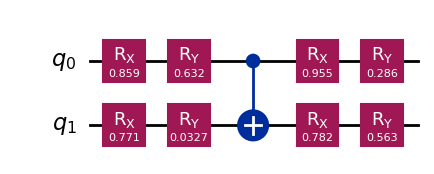

In [114]:
ansatz=TwoLocal(num_qubits=qubits,rotation_blocks=["rx","ry"],entanglement_blocks="cx",entanglement='linear',reps=1)
a=ansatz.num_parameters
b=np.random.rand(a)
### This is for illustration how can the weights be assigned but not necessary for VQE
z=ansatz.assign_parameters(b)
z.decompose().draw("mpl")

Now generate the circuit

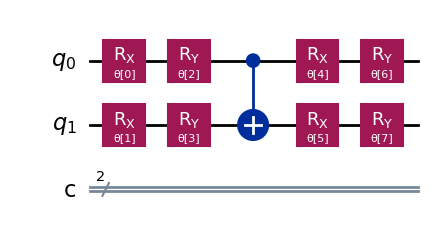

In [115]:
qc=QuantumCircuit(qubits,qubits)
qc.compose(ansatz,inplace=True)
qc.decompose().draw("mpl")

Use estimator primitive for energy calculation

In [116]:
from qiskit.primitives import StatevectorEstimator
b=np.random.rand(a)
estimator = StatevectorEstimator()
job=estimator.run([(qc,Pauli,[b])]).result()
value=job[0].data.evs
#print(value)
# k=[]
# for _ in range(500):
#     b=np.random.rand(a)
#     estimator = StatevectorEstimator()
#     job=estimator.run([(qc,Pauli,[b])]).result()
#     value=job[0].data.evs
#     k.append(value)
# print(np.mean(k))


1.3343730052573015
